# Improve distances from embedding evaluation using metric learning

## Get average distances without metric learning

### Load candidate resolver data and embedd data

In [1]:
import copy

import pandas as pd
import numpy as np

from src.candidate_resolver.embedding.BertEmbedder import BertEmbedder
from src.candidate_resolver.embedding.embedder_functions import EmbeddingFunctionProvider
from src.candidate_resolver.configurables.resolver_configurable_enums import EmbeddingType

2022-08-22 20:45:50.190247: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcudart.so.11.0'; dlerror: libcudart.so.11.0: cannot open shared object file: No such file or directory
2022-08-22 20:45:50.190280: I tensorflow/stream_executor/cuda/cudart_stub.cc:29] Ignore above cudart dlerror if you do not have a GPU set up on your machine.


In [2]:
def read_initial_dataset_from(csv_file):
    return pd.read_csv(csv_file, sep=";", dtype="string")

In [3]:
data = read_initial_dataset_from("../../res/thesis_demonstration_set/training_examples")
data

,Lifted instance,DSL output
0,"Select [,column] [table]","SELECT([,column], [table])"
1,"Take [,column] [table]","SELECT([,column], [table])"
2,"Show [,column] [table]","SELECT([,column], [table])"
3,"Display [,column] [table]","SELECT([,column], [table])"
4,"Delete [,column] [table]","DELETE([,column], [table])"
5,"Remove [,column] [table]","DELETE([,column], [table])"
6,"Erase [,column] [table]","DELETE([,column], [table])"
7,"Add [,column] [table]","ADD([,column], [table])"
8,"Append [,column] [table]","ADD([,column], [table])"
9,Sort [condition],SORT([condition])


In [4]:
embedder = BertEmbedder.initialize("https://tfhub.dev/tensorflow/bert_en_uncased_preprocess/3", "https://tfhub.dev/tensorflow/bert_en_wwm_uncased_L-24_H-1024_A-16/4")
embedder_provider = EmbeddingFunctionProvider(embedder)

2022-08-22 20:45:52.701424: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcuda.so.1'; dlerror: libcuda.so.1: cannot open shared object file: No such file or directory
2022-08-22 20:45:52.701453: W tensorflow/stream_executor/cuda/cuda_driver.cc:269] failed call to cuInit: UNKNOWN ERROR (303)
2022-08-22 20:45:52.701475: I tensorflow/stream_executor/cuda/cuda_diagnostics.cc:156] kernel driver does not appear to be running on this host (WorkPad): /proc/driver/nvidia/version does not exist
2022-08-22 20:45:52.701725: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.
2022-08-22 20:46:15.458756: W tensorflow/core/framework/cpu_allocator_impl.cc:82] Allocation of 125018112 exceeds 1

In [5]:
sequence_embedder = embedder_provider\
    .select_embedding_function(EmbeddingType.SEQUENCE)
bert_pooled_embedder = embedder_provider\
    .select_embedding_function(EmbeddingType.BERT_POOLED)
positionally_encoded_sequence_embedder = embedder_provider\
    .select_embedding_function(EmbeddingType.SEQUENCE_POSITIONAL)
max_pooled_embedder = embedder_provider\
    .select_embedding_function(EmbeddingType.MAX_POOLED)
avg_pooled_embedder = embedder_provider\
    .select_embedding_function(EmbeddingType.AVG_POOLED)
max_pooled_positionally_encoded_sequence_embedder = embedder_provider\
    .select_embedding_function(EmbeddingType.MAX_POOLED_POSITIONAL)
avg_pooled_positionally_encoded_sequence_embedder = embedder_provider\
    .select_embedding_function(EmbeddingType.AVG_POOLED_POSITIONAL)
summed_quadratic_kernel_sequence_embedder = embedder_provider\
    .select_embedding_function(EmbeddingType.SUMMED_QUADRATIC_KERNEL_SEQUENCE)
summed_quadratic_kernel_bert_pooled_embedder = embedder_provider\
    .select_embedding_function(EmbeddingType.SUMMED_QUADRATIC_KERNEL_BERT_POOLED)
summed_quadratic_kernel_positionally_encoded_sequence_embedder = embedder_provider\
    .select_embedding_function(EmbeddingType.SUMMED_QUADRATIC_KERNEL_SEQUENCE_POSITIONAL)

In [6]:
embedded_data = copy.deepcopy(data)
embedded_data["Sequence embedding"] = embedded_data["Lifted instance"]\
    .map(sequence_embedder)
embedded_data["Pooled embedding"] = embedded_data["Lifted instance"]\
    .map(bert_pooled_embedder)
embedded_data["Sequence embedding pos encoded"] = embedded_data["Lifted instance"]\
    .map(positionally_encoded_sequence_embedder)
embedded_data["Max pooled embedding without pos"] = embedded_data["Lifted instance"]\
    .map(max_pooled_embedder)
embedded_data["Avg pooled embedding without pos"] = embedded_data["Lifted instance"]\
    .map(avg_pooled_embedder)
embedded_data["Max pooled embedding with pos"] = embedded_data["Lifted instance"]\
    .map(max_pooled_positionally_encoded_sequence_embedder)
embedded_data["Avg pooled embedding with pos"] = embedded_data["Lifted instance"]\
    .map(avg_pooled_positionally_encoded_sequence_embedder)
embedded_data["Summed quadratic kernel sequence embedding"] = \
    embedded_data["Lifted instance"].map(summed_quadratic_kernel_sequence_embedder)
embedded_data["Summed quadratic kernel sequence embedding with pos"] = \
    embedded_data["Lifted instance"]\
        .map(summed_quadratic_kernel_positionally_encoded_sequence_embedder)
embedded_data["Summed quadratic kernel pooled embedding"] = \
    embedded_data["Lifted instance"].map(summed_quadratic_kernel_bert_pooled_embedder)

In [7]:
embedded_data

,Lifted instance,DSL output,Sequence embedding,Pooled embedding,Sequence embedding pos encoded,Max pooled embedding without pos,Avg pooled embedding without pos,Max pooled embedding with pos,Avg pooled embedding with pos,Summed quadratic kernel sequence embedding,Summed quadratic kernel sequence embedding with pos,Summed quadratic kernel pooled embedding
0,"Select [,column] [table]","SELECT([,column], [table])","(((tf.Tensor(0.14310724, shape=(), dtype=float...","((tf.Tensor(0.94189095, shape=(), dtype=float3...","(((tf.Tensor(0.03406717, shape=(), dtype=float...","((tf.Tensor(2.1302745, shape=(), dtype=float32...","((tf.Tensor(0.012326387, shape=(), dtype=float...","((tf.Tensor(1.7551742, shape=(), dtype=float32...","((tf.Tensor(0.010527899, shape=(), dtype=float...","(tf.Tensor(3771445.5, shape=(), dtype=float32)...","(tf.Tensor(4503286.5, shape=(), dtype=float32)...","(tf.Tensor(667.687, shape=(), dtype=float32), ..."
1,"Take [,column] [table]","SELECT([,column], [table])","(((tf.Tensor(0.12190775, shape=(), dtype=float...","((tf.Tensor(0.96598876, shape=(), dtype=float3...","(((tf.Tensor(-0.029208653, shape=(), dtype=flo...","((tf.Tensor(2.0667095, shape=(), dtype=float32...","((tf.Tensor(-0.0039918846, shape=(), dtype=flo...","((tf.Tensor(1.6850508, shape=(), dtype=float32...","((tf.Tensor(0.007907195, shape=(), dtype=float...","(tf.Tensor(3806473.0, shape=(), dtype=float32)...","(tf.Tensor(4520642.0, shape=(), dtype=float32)...","(tf.Tensor(699.78394, shape=(), dtype=float32)..."
2,"Show [,column] [table]","SELECT([,column], [table])","(((tf.Tensor(0.103115246, shape=(), dtype=floa...","((tf.Tensor(0.9561712, shape=(), dtype=float32...","(((tf.Tensor(0.056016434, shape=(), dtype=floa...","((tf.Tensor(2.2714014, shape=(), dtype=float32...","((tf.Tensor(0.01551667, shape=(), dtype=float3...","((tf.Tensor(1.7946179, shape=(), dtype=float32...","((tf.Tensor(0.009919982, shape=(), dtype=float...","(tf.Tensor(3782721.0, shape=(), dtype=float32)...","(tf.Tensor(4505320.0, shape=(), dtype=float32)...","(tf.Tensor(693.22473, shape=(), dtype=float32)..."
3,"Display [,column] [table]","SELECT([,column], [table])","(((tf.Tensor(0.05739152, shape=(), dtype=float...","((tf.Tensor(0.9529922, shape=(), dtype=float32...","(((tf.Tensor(-0.10154228, shape=(), dtype=floa...","((tf.Tensor(2.0757692, shape=(), dtype=float32...","((tf.Tensor(0.0059459168, shape=(), dtype=floa...","((tf.Tensor(1.7831994, shape=(), dtype=float32...","((tf.Tensor(0.009194719, shape=(), dtype=float...","(tf.Tensor(3604980.5, shape=(), dtype=float32)...","(tf.Tensor(4607714.0, shape=(), dtype=float32)...","(tf.Tensor(683.0447, shape=(), dtype=float32),..."
4,"Delete [,column] [table]","DELETE([,column], [table])","(((tf.Tensor(0.18921411, shape=(), dtype=float...","((tf.Tensor(0.86055064, shape=(), dtype=float3...","(((tf.Tensor(-0.008708663, shape=(), dtype=flo...","((tf.Tensor(2.141731, shape=(), dtype=float32)...","((tf.Tensor(-0.019698666, shape=(), dtype=floa...","((tf.Tensor(1.5980527, shape=(), dtype=float32...","((tf.Tensor(0.0063043903, shape=(), dtype=floa...","(tf.Tensor(4233289.0, shape=(), dtype=float32)...","(tf.Tensor(5155118.5, shape=(), dtype=float32)...","(tf.Tensor(553.8817, shape=(), dtype=float32),..."
5,"Remove [,column] [table]","DELETE([,column], [table])","(((tf.Tensor(0.14014608, shape=(), dtype=float...","((tf.Tensor(0.9404374, shape=(), dtype=float32...","(((tf.Tensor(-0.11296007, shape=(), dtype=floa...","((tf.Tensor(1.9586685, shape=(), dtype=float32...","((tf.Tensor(-0.0032230832, shape=(), dtype=flo...","((tf.Tensor(1.717567, shape=(), dtype=float32)...","((tf.Tensor(0.008795554, shape=(), dtype=float...","(tf.Tensor(3910499.5, shape=(), dtype=float32)...","(tf.Tensor(4532213.5, shape=(), dtype=float32)...","(tf.Tensor(654.9574, shape=(), dtype=float32),..."
6,"Erase [,column] [table]","DELETE([,column], [table])","(((tf.Tensor(0.15260229, shape=(), dtype=float...","((tf.Tensor(0.94254184, shape=(), dtype=float3...","(((tf.Tensor(-0.

### Print distances

In [8]:
import itertools

from typing import List, Tuple
from src.candidate_resolver.scorers import euclidean_distance

In [9]:
def unpack_from(dataframe: pd.DataFrame, column: str):
    packed = dataframe[column].to_numpy()
    res = packed[0]
    for array in packed[1:]:
        res = np.vstack((res, array))

    return res

def make_labeled_pairs(dataframe: pd.DataFrame,
                       feature_column: str,
                       label_column: str,
                       unpack_feature_column: bool):
    features = unpack_from(dataframe, feature_column) if unpack_feature_column else dataframe[feature_column].to_numpy()
    labels = dataframe[label_column].to_numpy()
    return make_labeled_pairs_from(features, labels)

def make_labeled_pairs_from(features, labels):
    feature_pairs = []
    label_pairs = []
    for i, j in itertools.combinations(range(len(features)), 2):
        feature_pairs.append([features[i, :], features[j, :]])
        label_pairs.append([labels[i], labels[j]])
    return feature_pairs, label_pairs

In [10]:
def print_score_attributes_from_arrays(
        features: np.ndarray,
        labels: np.ndarray,
        feature_embedding_name: str,
        scorer):
    feature_pairs, label_pairs = make_labeled_pairs_from(features, labels)
    score_label_alignment = get_score_and_label_alignment(feature_pairs, label_pairs, scorer)
    print_attributes_of(score_label_alignment, feature_embedding_name)


def print_score_attributes_from_dataframe(
        data: pd.DataFrame,
        feature_column_name: str,
        label_column_name: str,
        scorer,
        unpack_features: bool = True):
    feature_pairs, label_pairs = make_labeled_pairs(
        data, feature_column_name, label_column_name, unpack_features
    )
    score_label_alignment = get_score_and_label_alignment(feature_pairs, label_pairs, scorer)
    print_attributes_of(score_label_alignment, feature_column_name)


def get_score_and_label_alignment(feature_pairs, label_pairs, scorer):
    res = []
    for i, label_pair in enumerate(label_pairs):
        score = scorer(feature_pairs[i][0], feature_pairs[i][1])
        res.append(
                (score, 1) if same_label_in(label_pair) else (score, 0)
            )
    return res


def same_label_in(label_pair):
    return label_pair[0] == label_pair[1]


def print_attributes_of(
        score_label_alignment: List[Tuple[float, int]],
        feature_embedding_name: str):
    same_label_scores = np.array([score for score, is_same_label in score_label_alignment if is_same_label == 1])
    not_same_label_scores = np.array([score for score, is_same_label in score_label_alignment if is_same_label == 0])
    same_min, same_max, same_avg, same_median = compute_min_max_avg_score(same_label_scores)
    not_same_min, not_same_max, not_same_avg, not_same_median = compute_min_max_avg_score(not_same_label_scores)
    same_text = f"Score attributes of the pairs with same label:\n" + \
                f"minimum score = {same_min}, maximum score = {same_max}\n" + \
                f"average score = {same_avg}, median score = {same_median}\n"
    not_same_text = f"Score attributes of the pairs with different labels:\n" + \
                    f"minimum score = {not_same_min}, maximum score = {not_same_max}\n" + \
                    f"average score = {not_same_avg}, median score = {not_same_median}\n"
    print(f"Score attributes over features with {feature_embedding_name}:")
    print(same_text)
    print(not_same_text)

def compute_min_max_avg_score(scores):
    return scores.min(), scores.max(), scores.mean(), np.median(scores)

In [11]:
print_score_attributes_from_dataframe(
    embedded_data,
    "Sequence embedding", "DSL output",
    euclidean_distance,
    unpack_features=True
)

Score attributes over features with Sequence embedding:
Score attributes of the pairs with same label:
minimum score = 32.002357482910156, maximum score = 101.48165130615234
average score = 58.41560745239258, median score = 48.220890045166016

Score attributes of the pairs with different labels:
minimum score = 37.06343078613281, maximum score = 115.10676574707031
average score = 79.65894317626953, median score = 92.30860900878906



In [12]:
print_score_attributes_from_dataframe(
    embedded_data,
    "Sequence embedding pos encoded", "DSL output",
    euclidean_distance,
    unpack_features=True
)

Score attributes over features with Sequence embedding pos encoded:
Score attributes of the pairs with same label:
minimum score = 10.263016700744629, maximum score = 37.33660888671875
average score = 20.57228660583496, median score = 16.002880096435547

Score attributes of the pairs with different labels:
minimum score = 9.048330307006836, maximum score = 66.51458740234375
average score = 37.212738037109375, median score = 34.22983169555664



In [13]:
print_score_attributes_from_dataframe(
    embedded_data,
    "Max pooled embedding without pos", "DSL output",
    euclidean_distance,
    unpack_features=True
)

Score attributes over features with Max pooled embedding without pos:
Score attributes of the pairs with same label:
minimum score = 0.4865943193435669, maximum score = 1.5294564962387085
average score = 1.1735254526138306, median score = 1.3221063613891602

Score attributes of the pairs with different labels:
minimum score = 0.7873362898826599, maximum score = 2.549903392791748
average score = 1.583655595779419, median score = 1.4816458225250244



In [14]:
print_score_attributes_from_dataframe(
    embedded_data,
    "Avg pooled embedding without pos", "DSL output",
    euclidean_distance,
    unpack_features=True
)

Score attributes over features with Avg pooled embedding without pos:
Score attributes of the pairs with same label:
minimum score = 0.07380219548940659, maximum score = 0.17059525847434998
average score = 0.11653797328472137, median score = 0.11438216269016266

Score attributes of the pairs with different labels:
minimum score = 0.07428664714097977, maximum score = 0.23713357746601105
average score = 0.15358585119247437, median score = 0.1375008523464203



In [15]:
print_score_attributes_from_dataframe(
    embedded_data,
    "Max pooled embedding with pos", "DSL output",
    euclidean_distance,
    unpack_features=True
)

Score attributes over features with Max pooled embedding with pos:
Score attributes of the pairs with same label:
minimum score = 0.4530446529388428, maximum score = 1.4541008472442627
average score = 0.8194581866264343, median score = 0.7348116636276245

Score attributes of the pairs with different labels:
minimum score = 0.5211110711097717, maximum score = 1.953480839729309
average score = 1.0304441452026367, median score = 1.1485823392868042



In [16]:
print_score_attributes_from_dataframe(
    embedded_data,
    "Avg pooled embedding with pos", "DSL output",
    euclidean_distance,
    unpack_features=True
)

Score attributes over features with Avg pooled embedding with pos:
Score attributes of the pairs with same label:
minimum score = 0.008081677369773388, maximum score = 0.028648672625422478
average score = 0.015412035398185253, median score = 0.011613882146775723

Score attributes of the pairs with different labels:
minimum score = 0.005697561427950859, maximum score = 0.1192072331905365
average score = 0.05071256309747696, median score = 0.027172062546014786



In [17]:
print_score_attributes_from_dataframe(
    embedded_data,
    "Summed quadratic kernel sequence embedding", "DSL output",
    euclidean_distance,
    unpack_features=True
)

Score attributes over features with Summed quadratic kernel sequence embedding:
Score attributes of the pairs with same label:
minimum score = 802369.5625, maximum score = 9366171.0
average score = 3916748.5, median score = 2408993.5

Score attributes of the pairs with different labels:
minimum score = 711379.0, maximum score = 16903300.0
average score = 7476016.5, median score = 7833981.0



In [18]:
print_score_attributes_from_dataframe(
    embedded_data,
    "Summed quadratic kernel sequence embedding with pos", "DSL output",
    euclidean_distance,
    unpack_features=True
)

Score attributes over features with Summed quadratic kernel sequence embedding with pos:
Score attributes of the pairs with same label:
minimum score = 47187.87109375, maximum score = 5696660.5
average score = 1802037.375, median score = 323943.09375

Score attributes of the pairs with different labels:
minimum score = 81095.1953125, maximum score = 13879867.0
average score = 5925314.0, median score = 5578582.5



In [19]:
print_score_attributes_from_dataframe(
    embedded_data,
    "Summed quadratic kernel pooled embedding", "DSL output",
    euclidean_distance,
    unpack_features=True
)

Score attributes over features with Summed quadratic kernel pooled embedding:
Score attributes of the pairs with same label:
minimum score = 630.2261962890625, maximum score = 1971.0753173828125
average score = 1246.503173828125, median score = 1230.176513671875

Score attributes of the pairs with different labels:
minimum score = 1000.7723999023438, maximum score = 4970.5751953125
average score = 2818.296630859375, median score = 2473.45556640625



## Improve distances using neighborhood component analysis (NCA)

In [20]:
from metric_learn import NCA

In [21]:
def train_metric_learner_and_print_score_attributes(
        data: pd.DataFrame,
        training_feature_column_name: str,
        label_column_name : str,
        metric_learner,
        scorer):
    features = unpack_from(data, training_feature_column_name)
    labels = data[label_column_name]
    transformed_features = metric_learner.fit_transform(features, labels)
    print_score_attributes_from_arrays(
        transformed_features, labels, training_feature_column_name, scorer
    )
    return metric_learner

In [22]:
nca_bert_pooled = NCA(max_iter=1000)
nca_bert_pooled = train_metric_learner_and_print_score_attributes(
    embedded_data,
    "Pooled embedding", "DSL output",
    nca_bert_pooled,
    euclidean_distance
)

Score attributes over features with Pooled embedding:
Score attributes of the pairs with same label:
minimum score = 0.6339690088007716, maximum score = 5.507008881372526
average score = 2.448281309217916, median score = 2.2186984010723023

Score attributes of the pairs with different labels:
minimum score = 2.4174809728048645, maximum score = 11.01825803712295
average score = 6.704512909114528, median score = 6.343447634022287



In [23]:
nca_max_pooled = NCA(max_iter=1000)
nca_max_pooled = train_metric_learner_and_print_score_attributes(
    embedded_data,
    "Max pooled embedding without pos", "DSL output",
    nca_max_pooled,
    euclidean_distance
)

Score attributes over features with Max pooled embedding without pos:
Score attributes of the pairs with same label:
minimum score = 0.7068545132589369, maximum score = 4.6941175065223515
average score = 2.75317849619081, median score = 2.756982108628404

Score attributes of the pairs with different labels:
minimum score = 2.1688182980479076, maximum score = 9.104406122017123
average score = 5.999465446840347, median score = 5.4680884397021625



In [24]:
nca_avg_pooled = NCA(max_iter=1000)
nca_avg_pooled = train_metric_learner_and_print_score_attributes(
    embedded_data,
    "Avg pooled embedding without pos", "DSL output",
    nca_avg_pooled,
    euclidean_distance
)

Score attributes over features with Avg pooled embedding without pos:
Score attributes of the pairs with same label:
minimum score = 0.8413650763308002, maximum score = 6.378855246077367
average score = 4.356036690023037, median score = 4.456445603689074

Score attributes of the pairs with different labels:
minimum score = 3.693190964510584, maximum score = 44.501153267945455
average score = 19.895243534982292, median score = 8.923731438748508



In [25]:
nca_max_pooled_pos = NCA(max_iter=1000)
nca_max_pooled_pos = train_metric_learner_and_print_score_attributes(
    embedded_data,
    "Max pooled embedding with pos", "DSL output",
    nca_max_pooled_pos,
    euclidean_distance
)

Score attributes over features with Max pooled embedding with pos:
Score attributes of the pairs with same label:
minimum score = 1.388693765728474, maximum score = 8.803865527038836
average score = 4.7235857748865, median score = 4.374026725726452

Score attributes of the pairs with different labels:
minimum score = 1.9715217853178921, maximum score = 21.09483487911432
average score = 11.618373608602544, median score = 9.167934963761539



In [26]:
nca_avg_pooled_pos = NCA(max_iter=1000)
nca_avg_pooled_pos = train_metric_learner_and_print_score_attributes(
    embedded_data,
    "Avg pooled embedding with pos", "DSL output",
    nca_avg_pooled_pos,
    euclidean_distance
)

Score attributes over features with Avg pooled embedding with pos:
Score attributes of the pairs with same label:
minimum score = 0.3356569001645249, maximum score = 15.478291939888788
average score = 2.898016877149396, median score = 1.0368806466451805

Score attributes of the pairs with different labels:
minimum score = 2.5556258641705245, maximum score = 95.37554522291505
average score = 36.9838664950917, median score = 13.165844155001523



## Improve distances using large margin nearest neighbor method (LMNN)

In [40]:
from metric_learn import LMNN

In [41]:
lmnn_bert_pooled = LMNN(k=1, learn_rate=1e-3)
lmnn_bert_pooled_embedding = train_metric_learner_and_print_score_attributes(
    embedded_data, "Pooled embedding", "DSL output",
    lmnn_bert_pooled,
    euclidean_distance
)

Score attributes over features with Pooled embedding:
Score attributes of the pairs with same label:
minimum score = 0.041603282064729415, maximum score = 0.2591420314372355
average score = 0.11994444118867664, median score = 0.10638012580953621

Score attributes of the pairs with different labels:
minimum score = 1.0426014290557188, maximum score = 3.0894180558605395
average score = 1.96215869034859, median score = 2.1029435189420114



In [42]:
lmnn_max_pooled = LMNN(k=1, learn_rate=1e-3)
lmnn_max_pooled = train_metric_learner_and_print_score_attributes(
    embedded_data,
    "Max pooled embedding without pos", "DSL output",
    lmnn_max_pooled,
    euclidean_distance
)

Score attributes over features with Max pooled embedding without pos:
Score attributes of the pairs with same label:
minimum score = 0.05577566603653994, maximum score = 0.5943596393182274
average score = 0.2834220451017796, median score = 0.2575976226517852

Score attributes of the pairs with different labels:
minimum score = 1.0135093740384828, maximum score = 2.4261417123821896
average score = 1.489485484388208, median score = 1.139691768610407



In [43]:
lmnn_avg_pooled = LMNN(k=1, learn_rate=1e-3)
lmnn_avg_pooled = train_metric_learner_and_print_score_attributes(
    embedded_data, "Avg pooled embedding without pos", "DSL output",
    lmnn_avg_pooled,
    euclidean_distance
)

Score attributes over features with Avg pooled embedding without pos:
Score attributes of the pairs with same label:
minimum score = 0.044238389021589206, maximum score = 0.7002079128144844
average score = 0.32914357483848256, median score = 0.16778726457331566

Score attributes of the pairs with different labels:
minimum score = 1.0092251043769207, maximum score = 3.421720388712971
average score = 1.6865087455252121, median score = 1.4085026312392175



In [44]:
lmnn_max_pooled_pos = LMNN(k=1, learn_rate=1e-3)
lmnn_max_pooled_pos = train_metric_learner_and_print_score_attributes(
    embedded_data,
    "Max pooled embedding with pos", "DSL output",
    lmnn_max_pooled_pos,
    euclidean_distance
)

Score attributes over features with Max pooled embedding with pos:
Score attributes of the pairs with same label:
minimum score = 0.18942651536518015, maximum score = 0.9047534960244143
average score = 0.4370627603958611, median score = 0.4084662956903091

Score attributes of the pairs with different labels:
minimum score = 0.9997044410013795, maximum score = 1.9570755376699107
average score = 1.2726704566934912, median score = 1.21351486686997



In [45]:
lmnn_avg_pooled_pos = LMNN(k=1, learn_rate=1e-3)
lmnn_avg_pooled_pos = train_metric_learner_and_print_score_attributes(
    embedded_data,
    "Avg pooled embedding with pos", "DSL output",
    lmnn_avg_pooled_pos,
    euclidean_distance
)

Score attributes over features with Avg pooled embedding with pos:
Score attributes of the pairs with same label:
minimum score = 0.008097742316530794, maximum score = 0.029099841879781093
average score = 0.015545235929124093, median score = 0.011626115270697634

Score attributes of the pairs with different labels:
minimum score = 0.0056977610959545845, maximum score = 0.12203543693686882
average score = 0.051790793561680586, median score = 0.02762609937918147



## Plotting the improved data points

In [46]:
from src.plotting.plots import create_three_dimensional_scatter_of

In [47]:
embedded_data["nca bert pooled"] = embedded_data["Pooled embedding"].map(nca_bert_pooled.transform)
embedded_data["nca max pooled"] = embedded_data["Max pooled embedding without pos"].map(nca_max_pooled.transform)
embedded_data["nca avg pooled"] = embedded_data["Avg pooled embedding without pos"].map(nca_avg_pooled.transform)
embedded_data["nca max pooled pos"] = embedded_data["Max pooled embedding with pos"].map(nca_max_pooled_pos.transform)
embedded_data["nca avg pooled pos"] = embedded_data["Avg pooled embedding with pos"].map(nca_avg_pooled_pos.transform)
embedded_data["lmnn bert pooled"] = embedded_data["Pooled embedding"].map(lmnn_bert_pooled.transform)
embedded_data["lmnn max pooled"] = embedded_data["Max pooled embedding without pos"].map(lmnn_max_pooled.transform)
embedded_data["lmnn avg pooled"] = embedded_data["Avg pooled embedding without pos"].map(lmnn_avg_pooled.transform)
embedded_data["lmnn max pooled pos"] = embedded_data["Max pooled embedding with pos"].map(lmnn_max_pooled_pos.transform)
embedded_data["lmnn avg pooled pos"] = embedded_data["Avg pooled embedding with pos"].map(lmnn_avg_pooled_pos.transform)

/home/pandavid/PycharmProjects/EfficientParsing/venv/lib/python3.10/site-packages/sklearn/manifold/_t_sne.py:805: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  warnings.warn(
/home/pandavid/PycharmProjects/EfficientParsing/venv/lib/python3.10/site-packages/sklearn/manifold/_t_sne.py:991: FutureWarning: The PCA initialization in TSNE will change to have the standard deviation of PC1 equal to 1e-4 in 1.2. This will ensure better convergence.
  warnings.warn(


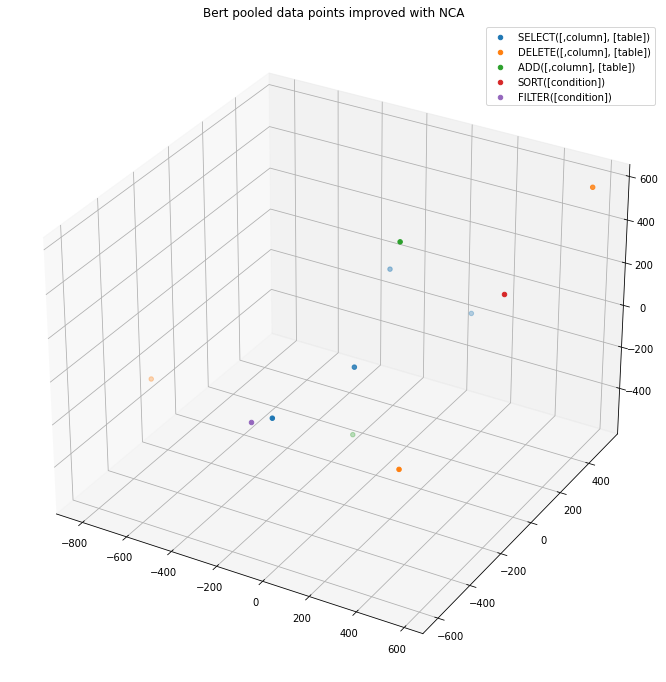

In [48]:
create_three_dimensional_scatter_of(
    "nca_bert_pooled_scatter",
    embedded_data, "nca bert pooled", "DSL output",
    "Bert pooled data points improved with NCA"
)

/home/pandavid/PycharmProjects/EfficientParsing/venv/lib/python3.10/site-packages/sklearn/manifold/_t_sne.py:805: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  warnings.warn(
/home/pandavid/PycharmProjects/EfficientParsing/venv/lib/python3.10/site-packages/sklearn/manifold/_t_sne.py:991: FutureWarning: The PCA initialization in TSNE will change to have the standard deviation of PC1 equal to 1e-4 in 1.2. This will ensure better convergence.
  warnings.warn(


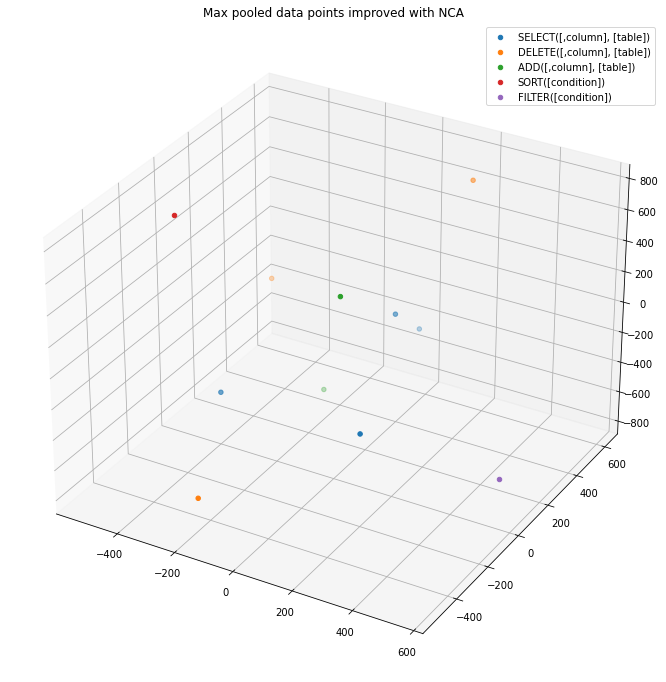

In [49]:
create_three_dimensional_scatter_of(
    "nca_max_pooled_scatter",
    embedded_data, "nca max pooled", "DSL output",
    "Max pooled data points improved with NCA"
)

/home/pandavid/PycharmProjects/EfficientParsing/venv/lib/python3.10/site-packages/sklearn/manifold/_t_sne.py:805: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  warnings.warn(
/home/pandavid/PycharmProjects/EfficientParsing/venv/lib/python3.10/site-packages/sklearn/manifold/_t_sne.py:991: FutureWarning: The PCA initialization in TSNE will change to have the standard deviation of PC1 equal to 1e-4 in 1.2. This will ensure better convergence.
  warnings.warn(


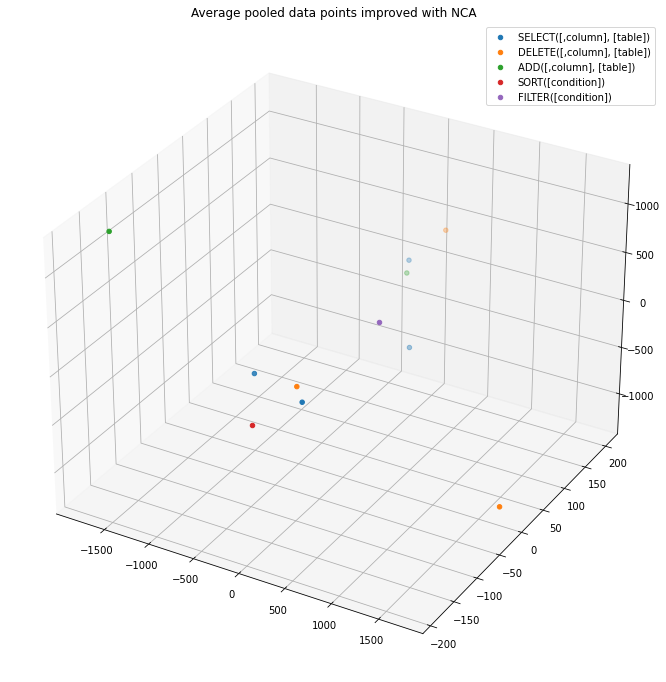

In [50]:
create_three_dimensional_scatter_of(
    "nca_avg_pooled_scatter",
    embedded_data, "nca avg pooled", "DSL output",
    "Average pooled data points improved with NCA"
)

/home/pandavid/PycharmProjects/EfficientParsing/venv/lib/python3.10/site-packages/sklearn/manifold/_t_sne.py:805: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  warnings.warn(
/home/pandavid/PycharmProjects/EfficientParsing/venv/lib/python3.10/site-packages/sklearn/manifold/_t_sne.py:991: FutureWarning: The PCA initialization in TSNE will change to have the standard deviation of PC1 equal to 1e-4 in 1.2. This will ensure better convergence.
  warnings.warn(


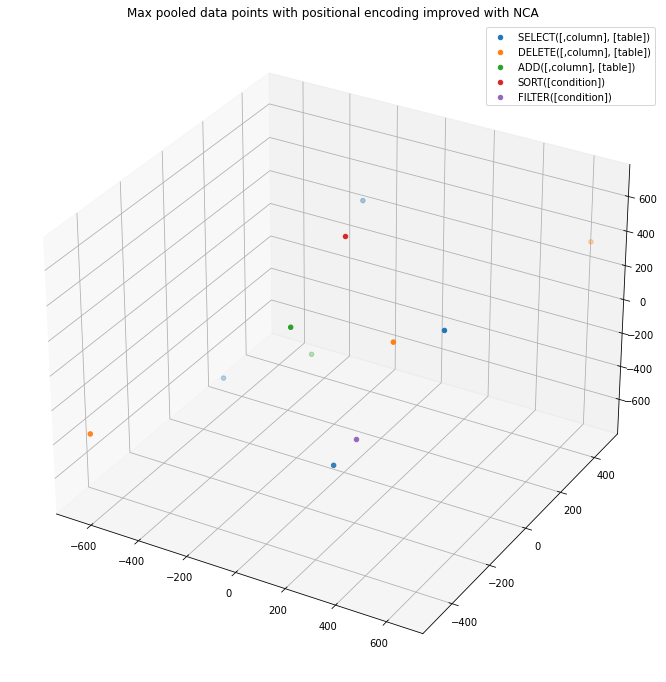

In [51]:
create_three_dimensional_scatter_of(
    "nca_max_pooled_pos_scatter",
    embedded_data, "nca max pooled pos", "DSL output",
    "Max pooled data points with positional encoding improved with NCA"
)

/home/pandavid/PycharmProjects/EfficientParsing/venv/lib/python3.10/site-packages/sklearn/manifold/_t_sne.py:805: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  warnings.warn(
/home/pandavid/PycharmProjects/EfficientParsing/venv/lib/python3.10/site-packages/sklearn/manifold/_t_sne.py:991: FutureWarning: The PCA initialization in TSNE will change to have the standard deviation of PC1 equal to 1e-4 in 1.2. This will ensure better convergence.
  warnings.warn(


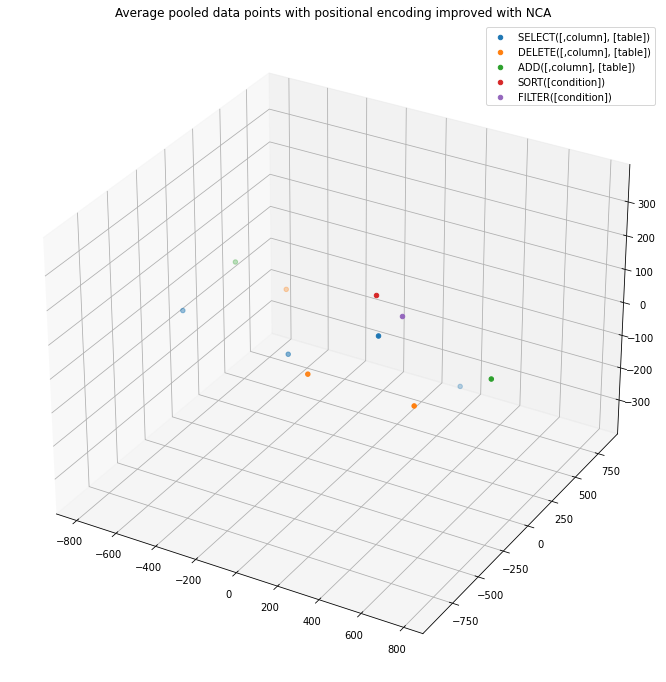

In [52]:
create_three_dimensional_scatter_of(
    "nca_avg_pooled_pos_scatter",
    embedded_data, "nca avg pooled pos", "DSL output",
    "Average pooled data points with positional encoding improved with NCA"
)

/home/pandavid/PycharmProjects/EfficientParsing/venv/lib/python3.10/site-packages/sklearn/manifold/_t_sne.py:805: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  warnings.warn(
/home/pandavid/PycharmProjects/EfficientParsing/venv/lib/python3.10/site-packages/sklearn/manifold/_t_sne.py:991: FutureWarning: The PCA initialization in TSNE will change to have the standard deviation of PC1 equal to 1e-4 in 1.2. This will ensure better convergence.
  warnings.warn(


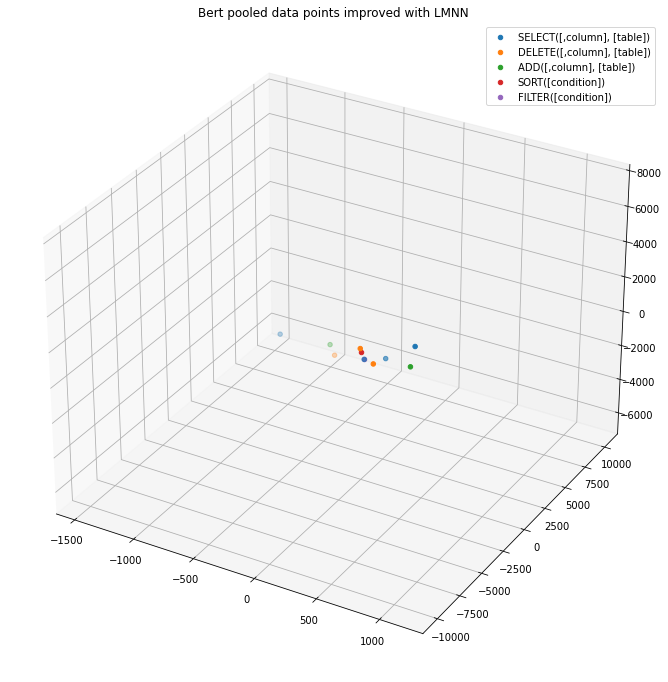

In [53]:
create_three_dimensional_scatter_of(
    "lmnn_bert_pooled_scatter",
    embedded_data, "lmnn bert pooled", "DSL output",
    "Bert pooled data points improved with LMNN"
)

/home/pandavid/PycharmProjects/EfficientParsing/venv/lib/python3.10/site-packages/sklearn/manifold/_t_sne.py:805: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  warnings.warn(
/home/pandavid/PycharmProjects/EfficientParsing/venv/lib/python3.10/site-packages/sklearn/manifold/_t_sne.py:991: FutureWarning: The PCA initialization in TSNE will change to have the standard deviation of PC1 equal to 1e-4 in 1.2. This will ensure better convergence.
  warnings.warn(


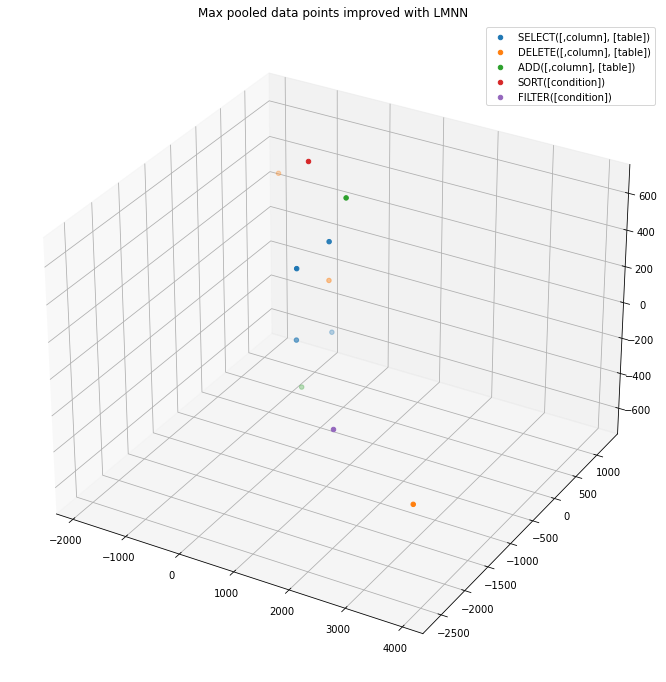

In [54]:
create_three_dimensional_scatter_of(
    "lmnn_max_pooled_scatter",
    embedded_data, "lmnn max pooled", "DSL output",
    "Max pooled data points improved with LMNN"
)

/home/pandavid/PycharmProjects/EfficientParsing/venv/lib/python3.10/site-packages/sklearn/manifold/_t_sne.py:805: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  warnings.warn(
/home/pandavid/PycharmProjects/EfficientParsing/venv/lib/python3.10/site-packages/sklearn/manifold/_t_sne.py:991: FutureWarning: The PCA initialization in TSNE will change to have the standard deviation of PC1 equal to 1e-4 in 1.2. This will ensure better convergence.
  warnings.warn(


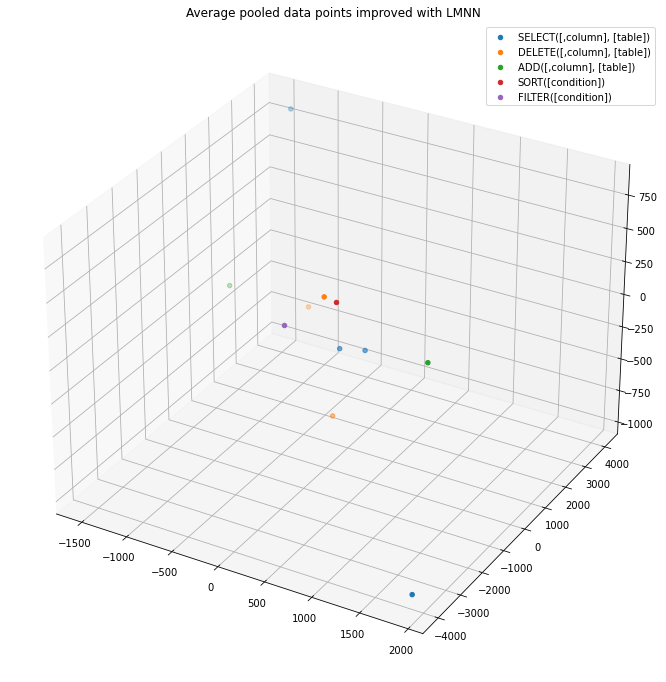

In [55]:
create_three_dimensional_scatter_of(
    "lmnn_avg_pooled_scatter",
    embedded_data, "lmnn avg pooled", "DSL output",
    "Average pooled data points improved with LMNN"
)

/home/pandavid/PycharmProjects/EfficientParsing/venv/lib/python3.10/site-packages/sklearn/manifold/_t_sne.py:805: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  warnings.warn(
/home/pandavid/PycharmProjects/EfficientParsing/venv/lib/python3.10/site-packages/sklearn/manifold/_t_sne.py:991: FutureWarning: The PCA initialization in TSNE will change to have the standard deviation of PC1 equal to 1e-4 in 1.2. This will ensure better convergence.
  warnings.warn(


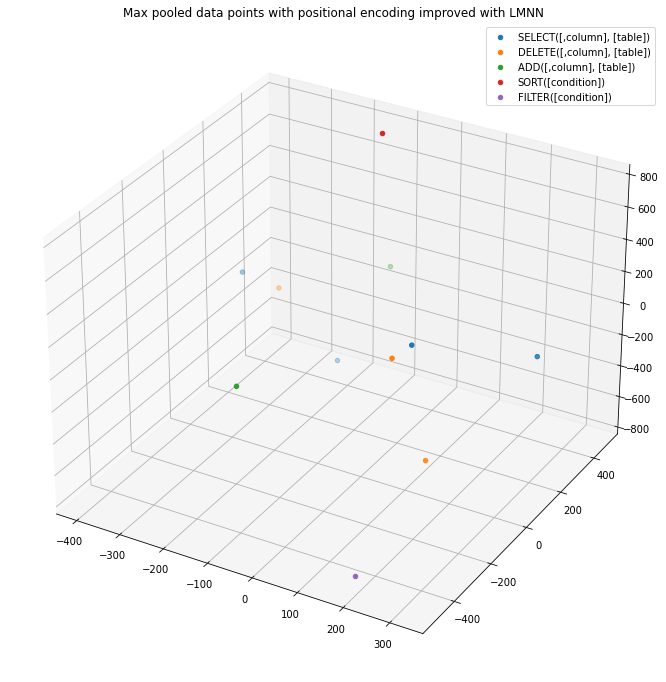

In [56]:
create_three_dimensional_scatter_of(
    "lmnn_max_pooled_pos_scatter",
    embedded_data, "lmnn max pooled pos", "DSL output",
    "Max pooled data points with positional encoding improved with LMNN"
)

/home/pandavid/PycharmProjects/EfficientParsing/venv/lib/python3.10/site-packages/sklearn/manifold/_t_sne.py:805: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  warnings.warn(
/home/pandavid/PycharmProjects/EfficientParsing/venv/lib/python3.10/site-packages/sklearn/manifold/_t_sne.py:991: FutureWarning: The PCA initialization in TSNE will change to have the standard deviation of PC1 equal to 1e-4 in 1.2. This will ensure better convergence.
  warnings.warn(


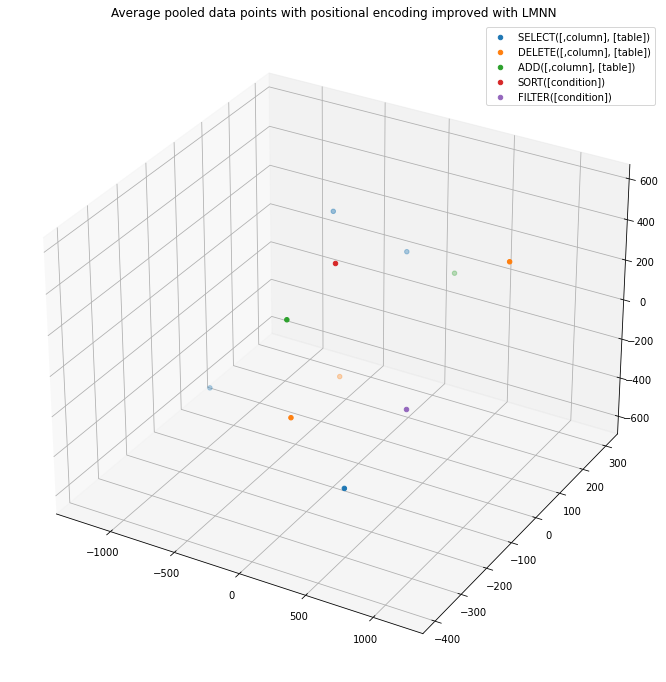

In [57]:
create_three_dimensional_scatter_of(
    "lmnn_avg_pooled_pos_scatter",
    embedded_data, "lmnn avg pooled pos", "DSL output",
    "Average pooled data points with positional encoding improved with LMNN"
)

## Histplot of distances between vectors in data set

In [58]:
from src.plotting.plots import create_distance_histplot

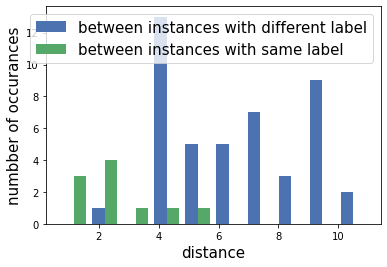

In [59]:
create_distance_histplot(
    "nca_bert_pooled_distance_histogram",
    embedded_data, "nca bert pooled",
    "DSL output", euclidean_distance
)

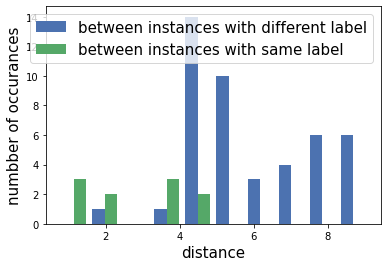

In [60]:
create_distance_histplot(
    "nca_max_pooled_distance_histogram",
    embedded_data, "nca max pooled",
    "DSL output", euclidean_distance
)

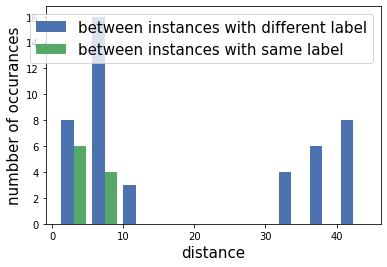

In [61]:
create_distance_histplot(
    "nca_avg_pooled_distance_histogram",
    embedded_data, "nca avg pooled",
    "DSL output", euclidean_distance
)

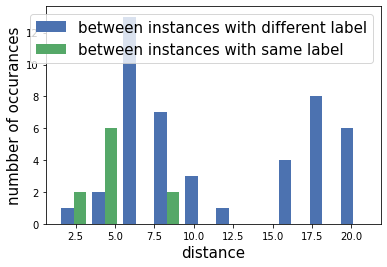

In [62]:
create_distance_histplot(
    "nca_max_pooled_pos_distance_histogram",
    embedded_data, "nca max pooled pos",
    "DSL output", euclidean_distance
)

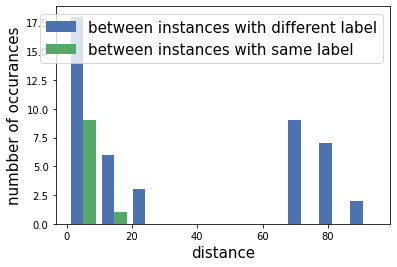

In [63]:
create_distance_histplot(
    "nca_avg_pooled_pos_distance_histogram",
    embedded_data, "nca avg pooled pos",
    "DSL output", euclidean_distance
)

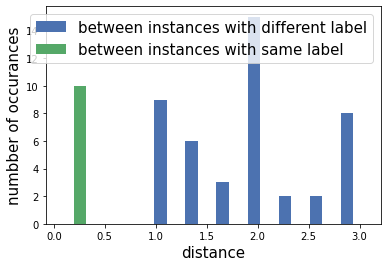

In [64]:
create_distance_histplot(
    "lmnn_bert_pooled_distance_histogram",
    embedded_data, "lmnn bert pooled",
    "DSL output", euclidean_distance
)

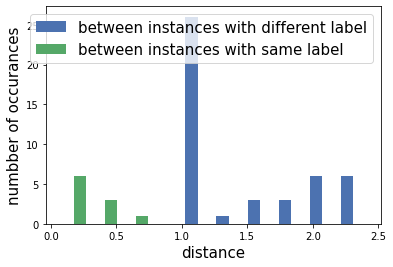

In [65]:
create_distance_histplot(
    "lmnn_max_pooled_distance_histogram",
    embedded_data, "lmnn max pooled",
    "DSL output", euclidean_distance
)

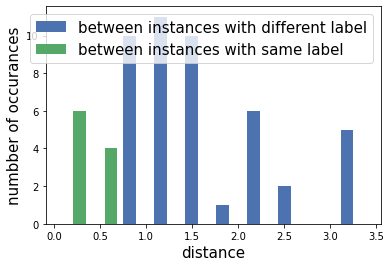

In [66]:
create_distance_histplot(
    "lmnn_avg_pooled_distance_histogram",
    embedded_data, "lmnn avg pooled",
    "DSL output", euclidean_distance
)

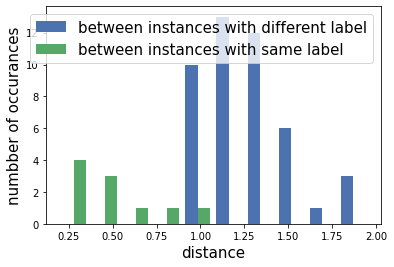

In [67]:
create_distance_histplot(
    "lmnn_max_pooled_pos_distance_histogram",
    embedded_data, "lmnn max pooled pos",
    "DSL output", euclidean_distance
)

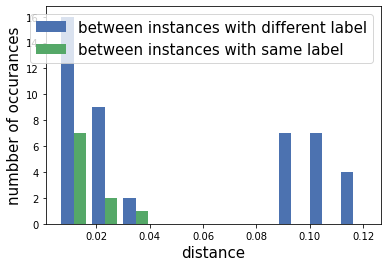

In [68]:
create_distance_histplot(
    "lmnn_avg_pooled_pos_distance_histogram",
    embedded_data, "lmnn avg pooled pos",
    "DSL output", euclidean_distance
)